In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg


In [2]:
T1LMatched1045 = Table.read('T1LMatched1045.fits', format = 'ascii' )
T2LMatched1045 = Table.read('T2LMatched1045.fits', format = 'ascii' )

T1LMatchedXRAYi = Table.read('T1LMatchXRAYi.fits', format = 'fits' )
T2LMatchedXRAYi = Table.read('T2LMatchXRAYi.fits', format = 'fits' )

In [3]:
T1LMatched1045.rename_column('col1', 'RA')  
T1LMatched1045.rename_column('col2', 'Dec') 
T1LMatched1045.rename_column('col3', 'Imag') 
T1LMatched1045.rename_column('col4', 'S')  
T1LMatched1045.rename_column('col5', 'zspec') 
T1LMatched1045.rename_column('col6', 'N')  
T1LMatched1045.rename_column('col7', 'zG')  
T1LMatched1045.rename_column('col8', 'chi2G')  
T1LMatched1045.rename_column('col9', 'LEll')  
T1LMatched1045.rename_column('col10', 'LSbc') 
T1LMatched1045.rename_column('col11', 'LIrr')
T1LMatched1045.rename_column('col12', 'zGA') 
T1LMatched1045.rename_column('col13', 'chi2GA') 
T1LMatched1045.rename_column('col14', 'LAGNp') 
T1LMatched1045.rename_column('col15', 'LELLp') 
T1LMatched1045.rename_column('col16', 'LSbcp') 
T1LMatched1045.rename_column('col17', 'LIrrp') 
T1LMatched1045.rename_column('col18', 'F') 
T1LMatched1045.rename_column('col19', 'EBV') 
T1LMatched1045.rename_column('col20', 'Chi2S') 
T1LMatched1045.rename_column('col21', 'SType') 
T1LMatched1045.rename_column('col22', 'LAGNerg') 
T1LMatched1045.rename_column('col23', 'LSbcerg') 
T1LMatched1045.rename_column('col24', 'LEllerg') 
T1LMatched1045.rename_column('col25', 'LIrrerg') 
T1LMatched1045.rename_column('col26', 'AV') 

T2LMatched1045.rename_column('col1', 'RA')  
T2LMatched1045.rename_column('col2', 'Dec') 
T2LMatched1045.rename_column('col3', 'Imag') 
T2LMatched1045.rename_column('col4', 'S')  
T2LMatched1045.rename_column('col5', 'zspec') 
T2LMatched1045.rename_column('col6', 'N')  
T2LMatched1045.rename_column('col7', 'zG')  
T2LMatched1045.rename_column('col8', 'chi2G')  
T2LMatched1045.rename_column('col9', 'LEll')  
T2LMatched1045.rename_column('col10', 'LSbc') 
T2LMatched1045.rename_column('col11', 'LIrr')
T2LMatched1045.rename_column('col12', 'zGA') 
T2LMatched1045.rename_column('col13', 'chi2GA') 
T2LMatched1045.rename_column('col14', 'LAGNp') 
T2LMatched1045.rename_column('col15', 'LELLp') 
T2LMatched1045.rename_column('col16', 'LSbcp') 
T2LMatched1045.rename_column('col17', 'LIrrp') 
T2LMatched1045.rename_column('col18', 'F') 
T2LMatched1045.rename_column('col19', 'EBV') 
T2LMatched1045.rename_column('col20', 'Chi2S') 
T2LMatched1045.rename_column('col21', 'SType')
T2LMatched1045.rename_column('col22', 'LAGNerg') 
T2LMatched1045.rename_column('col23', 'LSbcerg') 
T2LMatched1045.rename_column('col24', 'LEllerg') 
T2LMatched1045.rename_column('col25', 'LIrrerg') 
T2LMatched1045.rename_column('col26', 'AV') 



T1LMatchedXRAYi.rename_column('col1', 'RA')  
T1LMatchedXRAYi.rename_column('col2', 'Dec') 
T1LMatchedXRAYi.rename_column('col3', 'Imag') 
T1LMatchedXRAYi.rename_column('col4', 'S')  
T1LMatchedXRAYi.rename_column('col5', 'zspec') 
T1LMatchedXRAYi.rename_column('col6', 'N')  
T1LMatchedXRAYi.rename_column('col7', 'zG')  
T1LMatchedXRAYi.rename_column('col8', 'chi2G')  
T1LMatchedXRAYi.rename_column('col9', 'LEll')  
T1LMatchedXRAYi.rename_column('col10', 'LSbc') 
T1LMatchedXRAYi.rename_column('col11', 'LIrr')
T1LMatchedXRAYi.rename_column('col12', 'zGA') 
T1LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T1LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T1LMatchedXRAYi.rename_column('col15', 'LELLp') 
T1LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T1LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T1LMatchedXRAYi.rename_column('col18', 'F') 
T1LMatchedXRAYi.rename_column('col19', 'EBV') 
T1LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T1LMatchedXRAYi.rename_column('col21', 'SType') 
T1LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T1LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T1LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T1LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T1LMatchedXRAYi.rename_column('col26', 'AV') 

T2LMatchedXRAYi.rename_column('col1', 'RA')  
T2LMatchedXRAYi.rename_column('col2', 'Dec') 
T2LMatchedXRAYi.rename_column('col3', 'Imag') 
T2LMatchedXRAYi.rename_column('col4', 'S')  
T2LMatchedXRAYi.rename_column('col5', 'zspec') 
T2LMatchedXRAYi.rename_column('col6', 'N')  
T2LMatchedXRAYi.rename_column('col7', 'zG')  
T2LMatchedXRAYi.rename_column('col8', 'chi2G')  
T2LMatchedXRAYi.rename_column('col9', 'LEll')  
T2LMatchedXRAYi.rename_column('col10', 'LSbc') 
T2LMatchedXRAYi.rename_column('col11', 'LIrr')
T2LMatchedXRAYi.rename_column('col12', 'zGA') 
T2LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T2LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T2LMatchedXRAYi.rename_column('col15', 'LELLp') 
T2LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T2LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T2LMatchedXRAYi.rename_column('col18', 'F') 
T2LMatchedXRAYi.rename_column('col19', 'EBV') 
T2LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T2LMatchedXRAYi.rename_column('col21', 'SType')
T2LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T2LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T2LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T2LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T2LMatchedXRAYi.rename_column('col26', 'AV')

In [4]:
#creating x-ray undetected samples

from astropy.table import setdiff

T1LMatched1045Undetected = setdiff(T1LMatched1045,T1LMatchedXRAYi, keys = ('RA','Dec'))
T2LMatched1045Undetected = setdiff(T2LMatched1045,T2LMatchedXRAYi, keys = ('RA','Dec'))

In [5]:
T2LMatchedXRAYi.remove_columns(['PROB_F','PROB_S'])
T1LMatchedXRAYi.remove_columns(['PROB_F','PROB_S'])

In [6]:
T1LMatched1045UndetectedLZ = T1LMatched1045Undetected[T1LMatched1045Undetected['zGA']<=np.percentile(T1LMatched1045Undetected['zGA'], 33.3)]
T1LMatched1045UndetectedMZ = T1LMatched1045Undetected[np.logical_and(T1LMatched1045Undetected['zGA']>=np.percentile(T1LMatched1045Undetected['zGA'], 33.3),(T1LMatched1045Undetected['zGA']<=np.percentile(T1LMatched1045Undetected['zGA'], 66.6)))] 
T1LMatched1045UndetectedHZ = T1LMatched1045Undetected[T1LMatched1045Undetected['zGA']>=np.percentile(T1LMatched1045Undetected['zGA'], 66.6)] 


In [7]:
T1LMatchedXRAYiLZ = T1LMatchedXRAYi[T1LMatchedXRAYi['zGA']<=np.percentile(T1LMatchedXRAYi['zGA'], 33.3)]
T1LMatchedXRAYiMZ = T1LMatchedXRAYi[np.logical_and(T1LMatchedXRAYi['zGA']>=np.percentile(T1LMatchedXRAYi['zGA'], 33.3),(T1LMatchedXRAYi['zGA']<=np.percentile(T1LMatchedXRAYi['zGA'], 66.6)))] 
T1LMatchedXRAYiHZ = T1LMatchedXRAYi[T1LMatchedXRAYi['zGA']>=np.percentile(T1LMatchedXRAYi['zGA'], 66.6)] 

In [8]:
T2LMatched1045UndetectedLZ = T2LMatched1045Undetected[T2LMatched1045Undetected['zGA']<=np.percentile(T2LMatched1045Undetected['zGA'], 33.3)]
T2LMatched1045UndetectedMZ = T2LMatched1045Undetected[np.logical_and(T2LMatched1045Undetected['zGA']>=np.percentile(T2LMatched1045Undetected['zGA'], 33.3),(T2LMatched1045Undetected['zGA']<=np.percentile(T2LMatched1045Undetected['zGA'], 66.6)))] 
T2LMatched1045UndetectedHZ = T2LMatched1045Undetected[T2LMatched1045Undetected['zGA']>=np.percentile(T2LMatched1045Undetected['zGA'], 66.6)] 


In [9]:
T2LMatchedXRAYiLZ = T2LMatchedXRAYi[T2LMatchedXRAYi['zGA']<=np.percentile(T2LMatchedXRAYi['zGA'], 33.3)]
T2LMatchedXRAYiMZ = T2LMatchedXRAYi[np.logical_and(T2LMatchedXRAYi['zGA']>=np.percentile(T2LMatchedXRAYi['zGA'], 33.3),(T2LMatchedXRAYi['zGA']<=np.percentile(T2LMatchedXRAYi['zGA'], 66.6)))] 
T2LMatchedXRAYiHZ = T2LMatchedXRAYi[T2LMatchedXRAYi['zGA']>=np.percentile(T2LMatchedXRAYi['zGA'], 66.6)] 


In [10]:
from astropy.io import ascii


ascii.write(T1LMatched1045Undetected, 'T1LMatched1045Undetected.csv', overwrite=True, comment = False)
ascii.write(T2LMatched1045Undetected, 'T2LMatched1045Undetected.csv', overwrite=True, comment = False)

ascii.write(T1LMatched1045UndetectedLZ, 'T1LMatched1045UndetectedLZ.csv', overwrite=True, comment = False)
ascii.write(T1LMatched1045UndetectedMZ, 'T1LMatched1045UndetectedMZ.csv', overwrite=True, comment = False)
ascii.write(T1LMatched1045UndetectedHZ, 'T1LMatched1045UndetectedHZ.csv', overwrite=True, comment = False)

ascii.write(T2LMatched1045UndetectedLZ, 'T2LMatched1045UndetectedLZ.csv', overwrite=True, comment = False)
ascii.write(T2LMatched1045UndetectedMZ, 'T2LMatched1045UndetectedMZ.csv', overwrite=True, comment = False)
ascii.write(T2LMatched1045UndetectedHZ, 'T2LMatched1045UndetectedHZ.csv', overwrite=True, comment = False)

In [11]:

ascii.write(T1LMatchedXRAYi, 'T1LMatchedXRAYi.csv', overwrite=True, comment = False)
ascii.write(T2LMatchedXRAYi, 'T2LMatchedXRAYi.csv', overwrite=True, comment = False)

ascii.write(T1LMatchedXRAYiLZ, 'T1LMatchedXRAYiLZ.csv', overwrite=True, comment = False)
ascii.write(T1LMatchedXRAYiMZ, 'T1LMatchedXRAYiMZ.csv', overwrite=True, comment = False)
ascii.write(T1LMatchedXRAYiHZ, 'T1LMatchedXRAYiHZ.csv', overwrite=True, comment = False)

ascii.write(T2LMatchedXRAYiLZ, 'T2LMatchedXRAYiLZ.csv', overwrite=True, comment = False)
ascii.write(T2LMatchedXRAYiMZ, 'T2LMatchedXRAYiMZ.csv', overwrite=True, comment = False)
ascii.write(T2LMatchedXRAYiHZ, 'T2LMatchedXRAYiHZ.csv', overwrite=True, comment = False)

In [12]:
T1Un = Table.read('FINAL_stackdata (T1Un).fits', format = 'fits' )
T2Un = Table.read('FINAL_stackdata (T2Un).fits', format = 'fits' )

T1UnLZ = Table.read('FINAL_stackdata (T1UnLZ).fits', format = 'fits' )
T1UnMZ = Table.read('FINAL_stackdata (T1UnMZ).fits', format = 'fits' )
T1UnHZ = Table.read('FINAL_stackdata (T1UnHZ).fits', format = 'fits' )

T2UnLZ = Table.read('FINAL_stackdata (T2UnLZ).fits', format = 'fits' )
T2UnMZ = Table.read('FINAL_stackdata (T2UnMZ).fits', format = 'fits' )
T2UnHZ = Table.read('FINAL_stackdata (T2UnHZ).fits', format = 'fits' )

In [13]:
T1D = Table.read('FINAL_stackdata (T1D).fits', format = 'fits' )
T2D = Table.read('FINAL_stackdata (T2D).fits', format = 'fits' )

T1Dind = Table.read('FINAL_stackdata_individual_columns (T1D).fits', format = 'fits' )
T2Dind = Table.read('FINAL_stackdata_individual_columns (T2D).fits', format = 'fits' )

T1DLZ = Table.read('FINAL_stackdata (T1DLZ).fits', format = 'fits' )
T1DMZ = Table.read('FINAL_stackdata (T1DMZ).fits', format = 'fits' )
T1DHZ = Table.read('FINAL_stackdata (T1DHZ).fits', format = 'fits' )

T2DLZ = Table.read('FINAL_stackdata (T2DLZ).fits', format = 'fits' )
T2DMZ = Table.read('FINAL_stackdata (T2DMZ).fits', format = 'fits' )
T2DHZ = Table.read('FINAL_stackdata (T2DHZ).fits', format = 'fits' )

In [14]:
T2Dind

ind_ID,ind_cts_w_bg_s,ind_cts_w_bg_h,ind_ctsb,ind_cthb,ind_net_count_s,ind_net_count_h,ind_err_netc_s,ind_err_netc_h,ind_cnt_ps_s,ind_cnt_ps_h,ind_err_cnt_ps_s,ind_err_cnt_ps_h,ind_soft_flux,ind_hard_flux,ind_bgss,ind_bghs,ind_srcs_flux,ind_srch_flux,ind_bgss_sky,ind_bgss_det,ind_bghs_sky,ind_bghs_det,ind_srcrad,ind_mdist,ind_obsid,ind_istack,ind_igood,ind_ilim,ind_imdist,ind_exp_det,ind_exp_sky,ind_match
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
1.0,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,3698176.761983482,3698176.761983482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
1.0000001,5.0,0.0,5.0,12.0,4.9902859893519045,-0.2204082425203668,3.3979157616563596,1.8660254037844386,0.0005782430430906997,-2.5539524818657117e-05,0.0003937291679031005,-0.0002162233207217446,6.6690826444102336e-15,-8.829553104363364e-16,1426809.9571053728,1426809.9571053728,0.0,0.0,0.0,0.0,0.0,0.0,6.417083688757026,3.544071823055299,6990.0,1.0,1.0,1.0,1.0,9359.541128470137,8630.083922287948,1
1.0000002,15.0,19.0,2.0,8.0,14.95067533972763,18.80270135891052,4.9686269665968865,5.444097208657794,0.0018298785864165684,0.002301344909285074,0.0006081319996233154,0.0006663268834432866,2.2956888520024473e-14,2.7244416015732997e-14,1603866.0564430873,1603866.0564430873,0.0,0.0,0.0,0.0,0.0,0.0,7.60220597795728,4.774582593436918,7378.0,1.0,1.0,1.0,1.0,8691.824617474298,8170.310014395751,2
1.0000003,3.0,14.0,22.0,50.0,2.656165826228544,13.215780477632334,2.9364916731037085,4.840572873934304,5.975613320425177e-05,0.0002973172573870762,6.606266289492692e-05,0.0001088990433441477,7.72354479086648e-16,3.39008800719157e-15,5663942.000784533,5663942.000784533,0.0,0.0,0.0,0.0,0.0,0.0,6.306675311505773,4.031754241195662,4262.0,1.0,1.0,1.0,1.0,47172.97554744364,44450.095476384544,3
1.0000004,1.0,3.0,2.0,5.0,0.95032210902384,2.8758052725596,2.3228756555322954,2.9364916731037085,0.0002157327533304727,0.0006528369524401009,0.0005273163236484669,0.000666613380616169,2.2287278642021356e-15,6.064816731541626e-15,875113.5955701813,875113.5955701813,0.0,0.0,0.0,0.0,0.0,0.0,7.719823031518598,4.874909243583276,4233.0,1.0,1.0,1.0,1.0,4674.1201171875,4405.089604396223,4
1.0000005,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1138942.7102711385,1138942.7102711385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5
1.0000006,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,36256988.732414745,36256988.732414745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6
1.0000007,14.0,11.0,10.0,30.0,13.607871719924436,10.013064822692051,4.840572873934304,4.427827300200522,0.000564354520109219,0.00041526834681715046,0.00020075139136732447,0.00018363373807179308,6.857362750209788e-15,4.0274397239223536e-15,7132358.207606522,7132358.207606522,0.0,0.0,0.0,0.0,0.0,0.0,7.164251526755096,4.241498477501267,7947.0,1.0,1.0,1.0,1.0,26325.692413146964,24112.275591043228,7
1.0000008,0.0,0.0,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,1171884.2699286027,1171884.2699286027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8


In [15]:
len(T2LMatchedXRAYi['zGA'])

227

In [16]:


zGA = MaskedColumn(name = "zGA", data = T2LMatchedXRAYi['zGA'] , dtype=np.float64) 
T2Dind.add_column(zGA)
#T2Dind.replace_column('zGA',zGA)

zGA = MaskedColumn(name = "zGA", data = T1LMatchedXRAYi['zGA'] , dtype=np.float64) 
T1Dind.add_column(zGA)
#T1Dind.replace_column('zGA',zGA)

In [17]:
T1Un

out_net_ctss,out_net_cths,out_ctsb,out_cthb,out_srcs,out_srch,out_hr,out_nsrc,out_rates,out_rateh,out_errrates,out_errrateh,out_count_per_ss,out_count_per_sh,out_errcntpss,out_errcntpsh
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
203.0,141.0,702.0,1036.0,185.78145091573907,112.53951209985543,0.319524856892513,134.0,1.3864287381771572,0.8398471052228017,0.11398583898224028,0.0963125440282885,0.0001457861332586699,8.831183213924007e-05,1.1985870065932512e-05,1.0127482929018327e-05


In [18]:
T2Un

out_net_ctss,out_net_cths,out_ctsb,out_cthb,out_srcs,out_srch,out_hr,out_nsrc,out_rates,out_rateh,out_errrates,out_errrateh,out_count_per_ss,out_count_per_sh,out_errcntpss,out_errcntpsh
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
239.0,282.0,1128.0,2497.0,202.80495071775144,200.5014611270127,0.40739846186230977,322.0,0.6298290394961225,0.6226753451149463,0.05119211977391933,0.055326620250932414,5.9363521247423216e-05,5.8689261310577065e-05,4.825030761253751e-06,5.2147214416183844e-06


In [19]:
BR = MaskedColumn(name = "BR", data = T2Dind['ind_cts_w_bg_h']/T2Dind['ind_cts_w_bg_s'] , dtype=np.float64) 
T2Dind.add_column(BR)
#T2Dind.replace_column('BR',BR)

BR = MaskedColumn(name = "BR", data = T1Dind['ind_cts_w_bg_h']/T1Dind['ind_cts_w_bg_s'] , dtype=np.float64) 
T1Dind.add_column(BR)
#T1Dind.replace_column('BR',BR)

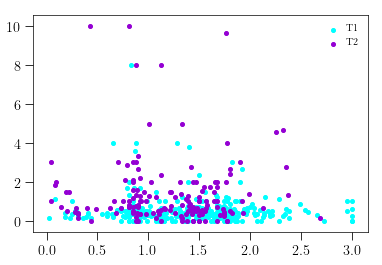

In [20]:
plt.scatter(T1Dind['zGA'],T1Dind['BR'], color = 'cyan', label = 'T1')
plt.scatter(T2Dind['zGA'],T2Dind['BR'], color = 'darkviolet', label = 'T2')
plt.legend()
#can put on errors, can put on histograms

In [21]:
BR = MaskedColumn(name = "BR", data =  T1Un['out_count_per_sh']/T1Un['out_count_per_ss'], dtype=np.float64) 
T1Un.add_column(BR)
#T1Un.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T2Un['out_count_per_sh']/T2Un['out_count_per_ss'], dtype=np.float64) 
T2Un.add_column(BR)
#T2Un.replace_column('BR',BR)



BR = MaskedColumn(name = "BR", data =  T1UnLZ['out_count_per_sh']/T1UnLZ['out_count_per_ss'], dtype=np.float64) 
T1UnLZ.add_column(BR)
#T1UnLZ.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T1UnMZ['out_count_per_sh']/T1UnMZ['out_count_per_ss'], dtype=np.float64) 
T1UnMZ.add_column(BR)
#T1UnMZ.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T1UnHZ['out_count_per_sh']/T1UnHZ['out_count_per_ss'], dtype=np.float64) 
T1UnHZ.add_column(BR)
#T1UnHZ.replace_column('BR',BR)



BR = MaskedColumn(name = "BR", data =  T2UnLZ['out_count_per_sh']/T2UnLZ['out_count_per_ss'], dtype=np.float64) 
T2UnLZ.add_column(BR)
#T2UnLZ.replace_column('BR',BR)

BR = MaskedColumn(name = "BR", data =  T2UnMZ['out_count_per_sh']/T2UnMZ['out_count_per_ss'], dtype=np.float64) 
T2UnMZ.add_column(BR)
#T2UnMZ.replace_column('BR',BR)

BR = MaskedColumn(name = "BR", data =  T2UnHZ['out_count_per_sh']/T2UnHZ['out_count_per_ss'], dtype=np.float64) 
T2UnHZ.add_column(BR)
#T2UnHZ.replace_column('BR',BR)


In [22]:
BR = MaskedColumn(name = "BR", data =  T1D['out_count_per_sh']/T1D['out_count_per_ss'], dtype=np.float64) 
T1D.add_column(BR)
#T1D.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T2D['out_count_per_sh']/T2D['out_count_per_ss'], dtype=np.float64) 
T2D.add_column(BR)
#T2D.replace_column('BR',BR)



BR = MaskedColumn(name = "BR", data =  T1DLZ['out_count_per_sh']/T1DLZ['out_count_per_ss'], dtype=np.float64) 
T1DLZ.add_column(BR)
#T1DLZ.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T1DMZ['out_count_per_sh']/T1DMZ['out_count_per_ss'], dtype=np.float64) 
T1DMZ.add_column(BR)
#T1DMZ.replace_column('BR',BR)
BR = MaskedColumn(name = "BR", data =  T1DHZ['out_count_per_sh']/T1DHZ['out_count_per_ss'], dtype=np.float64) 
T1DHZ.add_column(BR)
#T1DHZ.replace_column('BR',BR)



BR = MaskedColumn(name = "BR", data =  T2DLZ['out_count_per_sh']/T2DLZ['out_count_per_ss'], dtype=np.float64) 
T2DLZ.add_column(BR)
#T2DLZ.replace_column('BR',BR)

BR = MaskedColumn(name = "BR", data =  T2DMZ['out_count_per_sh']/T2DMZ['out_count_per_ss'], dtype=np.float64) 
T2DMZ.add_column(BR)
#T2DMZ.replace_column('BR',BR)

BR = MaskedColumn(name = "BR", data =  T2DHZ['out_count_per_sh']/T2DHZ['out_count_per_ss'], dtype=np.float64) 
T2DHZ.add_column(BR)
#T2DHZ.replace_column('BR',BR)

In [23]:
Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatched1045Undetected['zGA'])] , dtype=np.float64) 
T1Un.add_column(Z)
#T1Un.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatched1045Undetected['zGA'])], dtype=np.float64) 
T2Un.add_column(Z)
#T2Un.replace_column('Z',Z)



Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatched1045UndetectedLZ['zGA'])] , dtype=np.float64) 
T1UnLZ.add_column(Z)
#T1UnLZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatched1045UndetectedMZ['zGA'])] , dtype=np.float64) 
T1UnMZ.add_column(Z)
#T1UnMZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatched1045UndetectedHZ['zGA'])] , dtype=np.float64) 
T1UnHZ.add_column(Z)
#T1UnHZ.replace_column('Z',Z)



Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatched1045UndetectedLZ['zGA'])] , dtype=np.float64) 
T2UnLZ.add_column(Z)
#T2UnLZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatched1045UndetectedMZ['zGA'])] , dtype=np.float64) 
T2UnMZ.add_column(Z)
#T2UnMZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatched1045UndetectedHZ['zGA'])] , dtype=np.float64) 
T2UnHZ.add_column(Z)
#T2UnHZ.replace_column('Z',Z)


In [24]:


Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatchedXRAYi['zGA'])] , dtype=np.float64) 
T1D.add_column(Z)
#T1D.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatchedXRAYi['zGA'])], dtype=np.float64) 
T2D.add_column(Z)
#T2D.replace_column('Z',Z)



Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatchedXRAYiLZ['zGA'])] , dtype=np.float64) 
T1DLZ.add_column(Z)
#T1DLZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatchedXRAYiMZ['zGA'])] , dtype=np.float64) 
T1DMZ.add_column(Z)
#T1DMZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T1LMatchedXRAYiHZ['zGA'])] , dtype=np.float64) 
T1DHZ.add_column(Z)
#T1DHZ.replace_column('Z',Z)



Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatchedXRAYiLZ['zGA'])] , dtype=np.float64) 
T2DLZ.add_column(Z)
#T2DLZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatchedXRAYiMZ['zGA'])] , dtype=np.float64) 
T2DMZ.add_column(Z)
#T2DMZ.replace_column('Z',Z)
Z = MaskedColumn(name = "Z", data = [np.mean(T2LMatchedXRAYiHZ['zGA'])] , dtype=np.float64) 
T2DHZ.add_column(Z)
#T2DHZ.replace_column('Z',Z)

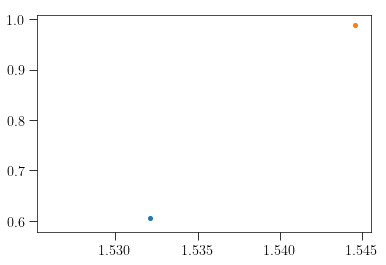

In [25]:
plt.scatter(T1Un['Z'],T1Un['BR'])
plt.scatter(T2Un['Z'],T2Un['BR'])

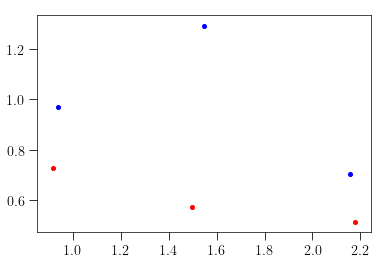

In [26]:
plt.scatter(T1UnLZ['Z'],T1UnLZ['BR'], color = 'red')
plt.scatter(T1UnMZ['Z'],T1UnMZ['BR'], color = 'red')
plt.scatter(T1UnHZ['Z'],T1UnHZ['BR'], color = 'red')
plt.scatter(T2UnLZ['Z'],T2UnLZ['BR'], color = 'blue')
plt.scatter(T2UnMZ['Z'],T2UnMZ['BR'], color = 'blue')
plt.scatter(T2UnHZ['Z'],T2UnHZ['BR'], color = 'blue')

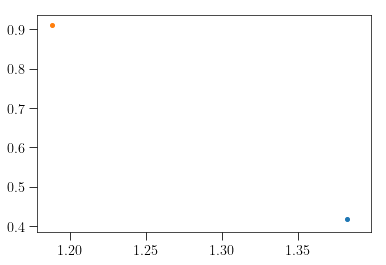

In [27]:
plt.scatter(T1D['Z'],T1D['BR'])
plt.scatter(T2D['Z'],T2D['BR'])

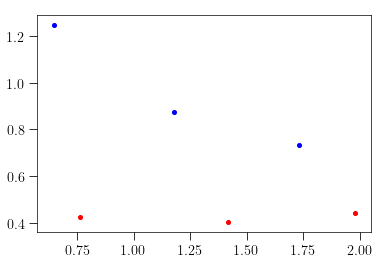

In [28]:
plt.scatter(T1DLZ['Z'],T1DLZ['BR'], color = 'red')
plt.scatter(T1DMZ['Z'],T1DMZ['BR'], color = 'red')
plt.scatter(T1DHZ['Z'],T1DHZ['BR'], color = 'red')
plt.scatter(T2DLZ['Z'],T2DLZ['BR'], color = 'blue')
plt.scatter(T2DMZ['Z'],T2DMZ['BR'], color = 'blue')
plt.scatter(T2DHZ['Z'],T2DHZ['BR'], color = 'blue')

In [29]:
Z = [0,0.5,1,1.5,2,2.5,3]
NH22H =  np.array([2.216*10**-5, 2.366*10**-5,  2.409*10**-5,  2.425*10**-5,  2.432*10**-5, 2.436*10**-5,  2.440*10**-5])
NH22S = np.array([1.993*10**-5,  3.392*10**-5,  4.074*10**-5,  4.413*10**-5,  4.595*10**-5,  4.700*10**-5,  4.760*10**-5])
NH22 = NH22H/NH22S
print(NH22)

NH22H15 = np.array([ 2.713*10**-5, 2.875*10**-5, 2.920*10**-5, 2.938*10**-5, 2.946*10**-5, 2.950*10**-5, 2.955*10**-5])
NH22S15 = np.array([ 1.586 *10**-5, 2.608 *10**-5, 3.087 *10**-5, 3.320 *10**-5, 3.444 *10**-5, 3.515 *10**-5, 3.555 *10**-5])
NH2215 = NH22H15/NH22S15
print(NH2215)

NH22H25 = np.array([ 1.588*10**-5, 1.709*10**-5, 1.744*10**-5, 1.757*10**-5, 1.763*10**-5, 1.765*10**-5, 1.769*10**-5])
NH22S25 = np.array([ 2.162*10**-5, 3.819*10**-5, 4.665*10**-5, 5.094*10**-5, 5.327*10**-5, 5.464*10**-5, 5.543*10**-5])
NH2225 = NH22H25/NH22S25
print(NH2225)


[1.11189162 0.69752358 0.59131075 0.5495128  0.52927095 0.51829787
 0.51260504]
[1.71059269 1.1023773  0.94590217 0.88493976 0.8554007  0.83926031
 0.83122363]
[0.73450509 0.44749935 0.3738478  0.34491559 0.33095551 0.32302343
 0.31914126]


In [30]:
NH21H = np.array([2.426*10**-5, 2.442*10**-5, 2.447*10**-5, 2.448*10**-5, 2.449*10**-5, 2.449*10**-5, 2.450*10**-5])
NH21S = np.array([4.390*10**-5,  4.712*10**-5,  4.815*10**-5,  4.858*10**-5,  4.879*10**-5,  4.891*10**-5,  4.897*10**-5])
NH21 = NH21H/NH21S
print (NH21)

NH21H15 = np.array([  2.940*10**-5,  2.957*10**-5, 2.962*10**-5, 2.964*10**-5, 2.965*10**-5, 2.965*10**-5, 2.965*10**-5])
NH21S15 = np.array([  3.302*10**-5, 3.522*10**-5, 3.592*10**-5, 3.621*10**-5, 3.635*10**-5, 3.642*10**-5, 3.647*10**-5])
NH2115 = NH21H15/NH21S15
print(NH2115)

NH21H25 = np.array([  1.757*10**-5, 1.771*10**-5, 1.774*10**-5, 1.775*10**-5, 1.776*10**-5, 1.776*10**-5, 1.777*10**-5])
NH21S25 = np.array([  5.072*10**-5, 5.481*10**-5, 5.616*10**-5, 5.672*10**-5, 5.699*10**-5, 5.714*10**-5, 5.723*10**-5])
NH2125 = NH21H25/NH21S25
print(NH2125)


[0.55261959 0.51825127 0.50820353 0.50391107 0.50194712 0.5007156
 0.50030631]
[0.89036947 0.83957978 0.82461024 0.81855841 0.81568088 0.81411312
 0.81299698]
[0.34641167 0.32311622 0.31588319 0.31294076 0.31163362 0.31081554
 0.31050149]


In [31]:
NH23H = np.array([ 1.106*10**-5, 1.773*10**-5, 2.072*10**-5, 2.206*10**-5, 2.269*10**-5, 2.306*10**-5, 2.344*10**-5])
NH23S = np.array([2.851*10**-7, 4.517*10**-6, 1.279*10**-5, 2.126*10**-5, 2.824*10**-5, 3.349*10**-5, 3.696*10**-5])
NH23 = NH23H/NH23S
print (NH23)

NH23H15 = np.array([ 1.468*10**-5, 2.222*10**-5, 2.547*10**-5, 2.693*10**-5, 2.766*10**-5, 2.810*10**-5, 2.853*10**-5])
NH23S15 = np.array([ 2.504E-07, 3.801E-06, 1.041*10**-5, 1.689*10**-5, 2.205*10**-5, 2.584*10**-5, 2.823*10**-5])
NH2315 = NH23H15/NH23S15
print(NH2315)

NH23H25 = np.array([ 7.278E-06, 1.240*10**-5, 1.480*10**-5, 1.586*10**-5, 1.635*10**-5, 1.661*10**-5, 1.691*10**-5])
NH23S25 = np.array([ 2.778E-07, 4.606E-06, 1.352*10**-5, 2.308*10**-5, 3.124*10**-5, 3.757*10**-5, 4.194*10**-5])
NH2325 = NH23H25/NH23S25
print(NH2325)


[38.79340582  3.92517157  1.62001564  1.03762935  0.80347025  0.68856375
  0.63419913]
[58.62619808  5.84583004  2.44668588  1.59443458  1.25442177  1.0874613
  1.01062699]
[26.1987041   2.69214069  1.09467456  0.68717504  0.52336748  0.44210806
  0.40319504]


(0, 3)

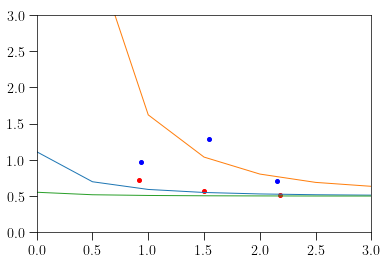

In [32]:
plt.scatter(T1UnLZ['Z'],T1UnLZ['BR'], color = 'red')
plt.scatter(T1UnMZ['Z'],T1UnMZ['BR'], color = 'red')
plt.scatter(T1UnHZ['Z'],T1UnHZ['BR'], color = 'red')
plt.scatter(T2UnLZ['Z'],T2UnLZ['BR'], color = 'blue')
plt.scatter(T2UnMZ['Z'],T2UnMZ['BR'], color = 'blue')
plt.scatter(T2UnHZ['Z'],T2UnHZ['BR'], color = 'blue')
plt.plot(Z, NH22)
plt.plot(Z, NH23)
plt.plot(Z, NH21)
plt.ylim(0,3)
plt.xlim(0,3)

(0, 3)

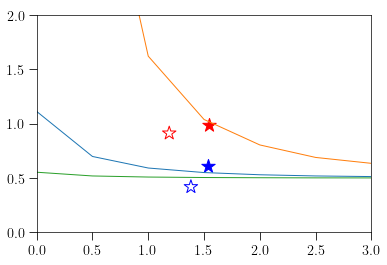

In [33]:
plt.scatter(T1Un['Z'],T1Un['BR'], color = 'blue', marker = '*', s = 200)
plt.scatter(T2Un['Z'],T2Un['BR'], color = 'red', marker = '*', s = 200)
plt.scatter(T1D['Z'],T1D['BR'], marker = '*', s = 200, facecolors='none', edgecolors='blue')
plt.scatter(T2D['Z'],T2D['BR'], marker = '*', s = 200, facecolors='none', edgecolors='red')
plt.plot(Z, NH22)
plt.plot(Z, NH23)
plt.plot(Z, NH21)
plt.ylim(0,2)
plt.xlim(0,3)

(0, 3)

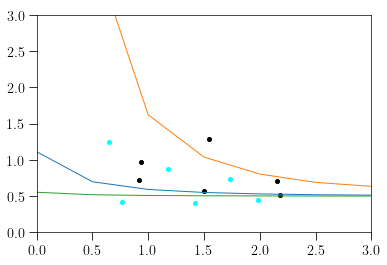

In [34]:
plt.scatter(T1UnLZ['Z'],T1UnLZ['BR'], color = 'black')
plt.scatter(T1UnMZ['Z'],T1UnMZ['BR'], color = 'black')
plt.scatter(T1UnHZ['Z'],T1UnHZ['BR'], color = 'black')
plt.scatter(T2UnLZ['Z'],T2UnLZ['BR'], color = 'black')
plt.scatter(T2UnMZ['Z'],T2UnMZ['BR'], color = 'black')
plt.scatter(T2UnHZ['Z'],T2UnHZ['BR'], color = 'black')
plt.scatter(T1DLZ['Z'],T1DLZ['BR'], color = 'cyan')
plt.scatter(T1DMZ['Z'],T1DMZ['BR'], color = 'cyan')
plt.scatter(T1DHZ['Z'],T1DHZ['BR'], color = 'cyan')
plt.scatter(T2DLZ['Z'],T2DLZ['BR'], color = 'cyan')
plt.scatter(T2DMZ['Z'],T2DMZ['BR'], color = 'cyan')
plt.scatter(T2DHZ['Z'],T2DHZ['BR'], color = 'cyan')
plt.plot(Z, NH22)
plt.plot(Z, NH23)
plt.plot(Z, NH21)
plt.ylim(0,3)
plt.xlim(0,3)

In [35]:
BRerrorT1Un = T1Un['BR']*np.sqrt((T1Un['out_errcntpsh']/T1Un['out_count_per_sh'])**2+(T1Un['out_errcntpss']/T1Un['out_count_per_ss'])**2)
print(BRerrorT1Un)

         BR        
-------------------
0.08547607302248242


In [36]:
BRerrorT2Un = T2Un['BR']*np.sqrt((T2Un['out_errcntpsh']/T2Un['out_count_per_sh'])**2+(T2Un['out_errcntpss']/T2Un['out_count_per_ss'])**2)
print(BRerrorT2Un)

         BR        
-------------------
0.11905320360519837


In [37]:
BRerrorT1D = T1D['BR']*np.sqrt((T1D['out_errcntpsh']/T1D['out_count_per_sh'])**2+(T1D['out_errcntpss']/T1D['out_count_per_ss'])**2)
print(BRerrorT1D)

         BR         
--------------------
0.009866490942144689


In [38]:
BRerrorT2D = T2D['BR']*np.sqrt((T2D['out_errcntpsh']/T2D['out_count_per_sh'])**2+(T2D['out_errcntpss']/T2D['out_count_per_ss'])**2)
print(BRerrorT2D)

         BR         
--------------------
0.031917857826210136


In [39]:
BRerrorT1UnLZ = T1UnLZ['BR']*np.sqrt((T1UnLZ['out_errcntpsh']/T1UnLZ['out_count_per_sh'])**2+(T1UnLZ['out_errcntpss']/T1UnLZ['out_count_per_ss'])**2)
print(BRerrorT1UnLZ)

         BR        
-------------------
0.15650355884020475


In [40]:
BRerrorT1UnMZ = T1UnMZ['BR']*np.sqrt((T1UnMZ['out_errcntpsh']/T1UnMZ['out_count_per_sh'])**2+(T1UnMZ['out_errcntpss']/T1UnMZ['out_count_per_ss'])**2)
print(BRerrorT1UnMZ)

        BR        
------------------
0.1929721049867646


In [41]:
BRerrorT1UnHZ = T1UnHZ['BR']*np.sqrt((T1UnHZ['out_errcntpsh']/T1UnHZ['out_count_per_sh'])**2+(T1UnHZ['out_errcntpss']/T1UnHZ['out_count_per_ss'])**2)
print(BRerrorT1UnHZ)

         BR        
-------------------
0.13139824304875805


In [42]:
BRerrorT2UnLZ = T2UnLZ['BR']*np.sqrt((T2UnLZ['out_errcntpsh']/T2UnLZ['out_count_per_sh'])**2+(T2UnLZ['out_errcntpss']/T2UnLZ['out_count_per_ss'])**2)
print(BRerrorT2UnLZ)

         BR        
-------------------
0.14136292547048587


In [43]:
BRerrorT2UnMZ = T2UnMZ['BR']*np.sqrt((T2UnMZ['out_errcntpsh']/T2UnMZ['out_count_per_sh'])**2+(T2UnMZ['out_errcntpss']/T2UnMZ['out_count_per_ss'])**2)
print(BRerrorT2UnMZ)

         BR        
-------------------
0.36968926862924456


In [44]:
BRerrorT2UnHZ = T2UnHZ['BR']*np.sqrt((T2UnHZ['out_errcntpsh']/T2UnHZ['out_count_per_sh'])**2+(T2UnHZ['out_errcntpss']/T2UnHZ['out_count_per_ss'])**2)
print(BRerrorT2UnHZ)

         BR        
-------------------
0.24094854995887569


In [45]:
BRerrorT1DLZ = T1DLZ['BR']*np.sqrt((T1DLZ['out_errcntpsh']/T1DLZ['out_count_per_sh'])**2+(T1DLZ['out_errcntpss']/T1DLZ['out_count_per_ss'])**2)
print(BRerrorT1DLZ)

         BR        
-------------------
0.01429265889312788


In [46]:
BRerrorT1DMZ = T1DMZ['BR']*np.sqrt((T1DMZ['out_errcntpsh']/T1DMZ['out_count_per_sh'])**2+(T1DMZ['out_errcntpss']/T1DMZ['out_count_per_ss'])**2)
print(BRerrorT1DMZ)

         BR        
-------------------
0.01741963408108623


In [47]:
BRerrorT1DHZ = T1DHZ['BR']*np.sqrt((T1DHZ['out_errcntpsh']/T1DHZ['out_count_per_sh'])**2+(T1DHZ['out_errcntpss']/T1DHZ['out_count_per_ss'])**2)
print(BRerrorT1DHZ)

         BR         
--------------------
0.022719479223790466


In [48]:
BRerrorT2DLZ = T2DLZ['BR']*np.sqrt((T2DLZ['out_errcntpsh']/T2DLZ['out_count_per_sh'])**2+(T2DLZ['out_errcntpss']/T2DLZ['out_count_per_ss'])**2)
print(BRerrorT2DLZ)

         BR        
-------------------
0.07722241897388708


In [49]:
BRerrorT2DMZ = T2DMZ['BR']*np.sqrt((T2DMZ['out_errcntpsh']/T2DMZ['out_count_per_sh'])**2+(T2DMZ['out_errcntpss']/T2DMZ['out_count_per_ss'])**2)
print(BRerrorT2DMZ)

         BR         
--------------------
0.050019730919094056


In [50]:
BRerrorT2DHZ = T2DHZ['BR']*np.sqrt((T2DHZ['out_errcntpsh']/T2DHZ['out_count_per_sh'])**2+(T2DHZ['out_errcntpss']/T2DHZ['out_count_per_ss'])**2)
print(BRerrorT2DHZ)

         BR        
-------------------
0.04669029299055208


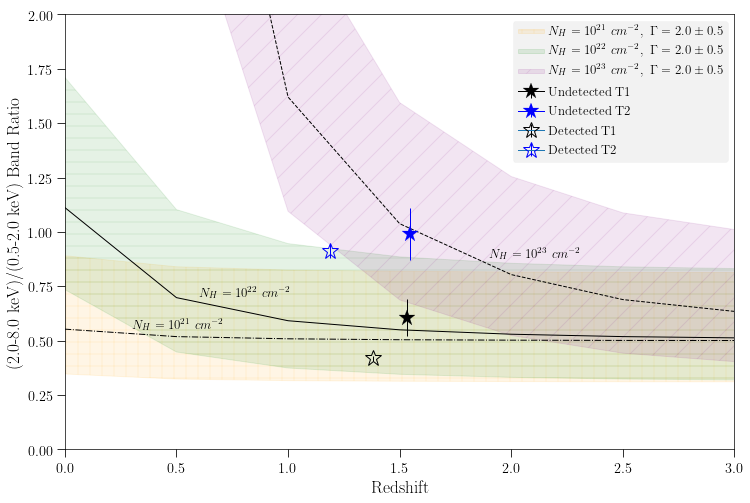

In [53]:
fig = plt.figure(figsize=(12,8))
gs = GridSpec(nrows=1,ncols=2, figure=fig)



plt.errorbar(T1Un['Z'],T1Un['BR'], yerr = BRerrorT1Un, ecolor = 'black',color = 'black', marker = '*', ms = 17, elinewidth = 1,label = ' Undetected T1')
plt.errorbar(T2Un['Z'],T2Un['BR'], yerr = BRerrorT2Un,ecolor = 'blue', color = 'blue', marker = '*', ms = 17, elinewidth = 1,label = ' Undetected T2')
plt.errorbar(T1D['Z'],T1D['BR'],yerr = BRerrorT1D, marker = '*', ms = 17, mfc='none',ecolor = 'black', elinewidth = 1, mec='black', mew = '1',label = ' Detected T1')
plt.errorbar(T2D['Z'],T2D['BR'],yerr = BRerrorT2D, marker = '*', ms = 17, mfc='none',ecolor = 'blue', elinewidth = 1, mec='blue', mew = '1',label = ' Detected T2')
#plt.errorbar(T1UnLZ['Z'],T1UnLZ['BR'],yerr = BRerrorT1UnLZ,ecolor = 'black', color = 'black', marker = '^', ms =7, elinewidth = 0.5, label = ' Undetected T1 split by blueshift')
#plt.errorbar(T1UnMZ['Z'],T1UnMZ['BR'],yerr = BRerrorT1UnMZ,ecolor = 'black', color = 'black', marker = '^', ms =7, elinewidth = 0.5, label = '_nolegend_')
#plt.errorbar(T1UnHZ['Z'],T1UnHZ['BR'],yerr = BRerrorT1UnHZ,ecolor = 'black', color = 'black',marker = '^', ms =7, elinewidth = 0.5, label = '_nolegend_')
#plt.errorbar(T2UnLZ['Z'],T2UnLZ['BR'],yerr = BRerrorT2UnLZ,ecolor = 'blue', color = 'blue',marker = '^', ms =7, elinewidth = 0.5, label = ' Undetected T2 split by blueshift')
#plt.errorbar(T2UnMZ['Z'],T2UnMZ['BR'],yerr = BRerrorT2UnMZ,ecolor = 'blue', color = 'blue',marker = '^', ms =7, elinewidth = 0.5, label = '_nolegend_')
#plt.errorbar(T2UnHZ['Z'],T2UnHZ['BR'],yerr = BRerrorT2UnHZ,ecolor = 'blue', color = 'blue',marker = '^', ms =7, elinewidth = 0.5, label = '_nolegend_')
#plt.errorbar(T1DLZ['Z'],T1DLZ['BR'],yerr = BRerrorT1DLZ, marker = '^', mfc='none',ecolor = 'black', mec='black', ms =7, elinewidth = 0.5, mew = '1', label = ' Detected T1 split by blueshift')
#plt.errorbar(T1DMZ['Z'],T1DMZ['BR'],yerr = BRerrorT1DMZ, marker = '^', mfc='none',ecolor = 'black', mec='black', ms =7, elinewidth = 0.5, mew = '1', label = '_nolegend_')
#plt.errorbar(T1DHZ['Z'],T1DHZ['BR'],yerr = BRerrorT1DHZ, marker = '^', mfc='none',ecolor = 'black', mec='black', ms =7, elinewidth = 0.5, mew = '1', label = '_nolegend_')
#plt.errorbar(T2DLZ['Z'],T2DLZ['BR'],yerr = BRerrorT2DLZ, marker = '^', mfc='none',ecolor = 'blue', mec='blue', ms =7, elinewidth = 0.5, mew = '1', label = ' Detected T2 split by blueshift')
#plt.errorbar(T2DMZ['Z'],T2DMZ['BR'],yerr = BRerrorT2DMZ, marker = '^', mfc='none',ecolor = 'blue', mec='blue', ms =7, elinewidth = 0.5, mew = '1', label = '_nolegend_')
#plt.errorbar(T2DHZ['Z'],T2DHZ['BR'],yerr = BRerrorT2DHZ, marker = '^', mfc='none',ecolor = 'blue', mec='blue', ms =7, elinewidth = 0.5, mew = '1', label = '_nolegend_')
#plt.scatter(T1Dind['zGA'],T1Dind['BR'], color = 'gray', label = 'Individual T1 Detected', alpha = 0.3)
#plt.scatter(T2Dind['zGA'],T2Dind['BR'], color = 'black', label = 'Individual T2 Detected', alpha = 0.3)
plt.plot(Z, NH22, c = 'black', linestyle = '-')
plt.plot(Z, NH23, c = 'black', linestyle = '--')
plt.plot(Z, NH21, c = 'black', linestyle = '-.')
plt.fill_between(Z,NH2115,NH2125,color = 'orange', hatch ='+', alpha = 0.1, label = r'$N_{H}=10^{21}\ cm^{-2},\ \Gamma=2.0\pm0.5$')
plt.fill_between(Z,NH2215,NH2225,color = 'green', hatch ='-', alpha = 0.1, label = r'$N_{H}=10^{22}\ cm^{-2},\ \Gamma=2.0\pm0.5$')
plt.fill_between(Z,NH2315,NH2325,color = 'purple', hatch ='/', alpha = 0.1, label = r'$N_{H}=10^{23}\ cm^{-2},\ \Gamma=2.0\pm0.5$')
plt.text(0.3, 0.55, r'$N_{H}=10^{21}\ cm^{-2}$', fontsize = 13)
plt.text(1.9, 0.88, r'$N_{H}=10^{23}\ cm^{-2}$', fontsize = 13)
plt.text(0.6, 0.7, r'$N_{H}=10^{22}\ cm^{-2}$', fontsize = 13)
plt.ylim(0,2)
plt.xlim(0,3)
plt.xlabel('Redshift')
plt.ylabel(r'(2.0-8.0 keV)/(0.5-2.0 keV) Band Ratio')
plt.legend(fontsize='13',frameon = True, framealpha=0.1, facecolor = 'gray')
plt.savefig('Figure10.png')
